## Brute-Force Matching with ORB detector

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
img1 = cv2.imread("D:/images/small.jpg")
img2 = cv2.imread("D:/images/big.jpg")

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

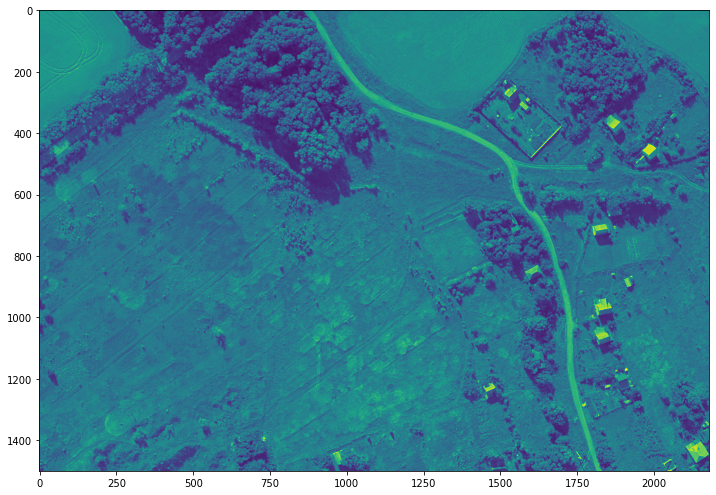

In [3]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img1_gray)

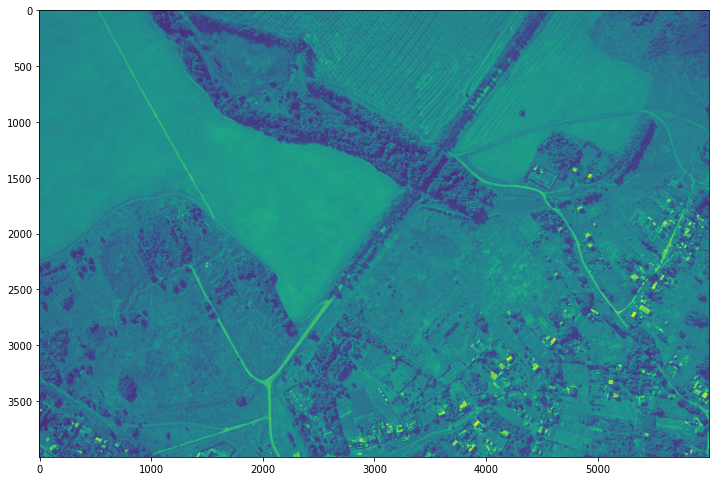

In [4]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img2_gray)

In [5]:
# Create our ORB detector and detect keypoints and descriptors
orb = cv2.ORB_create()

In [6]:
# Find keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

In [7]:
# Create a BFMatcher object.
# It will find all of the matching keypoints on two images
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)

In [8]:
matches = bf.match(descriptors1, descriptors2)

In [9]:
single_match = matches[0]
single_match.distance

69.0

In [10]:
matches = sorted(matches,key=lambda x:x.distance)

In [11]:
good_matches = matches[:10]
src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good_matches     ]).reshape(-1,1,2)
dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

dst = cv2.perspectiveTransform(pts,M)
dst += (w, 0)  # adding offset

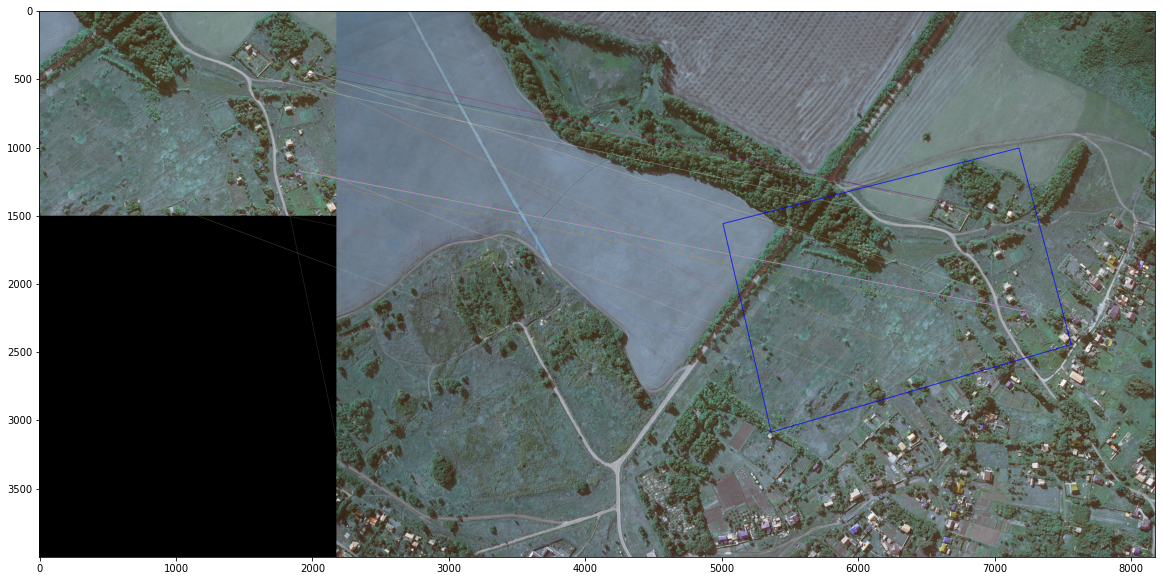

In [12]:
ORB_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:30], None, flags=2)
ORB_matches = cv2.polylines(ORB_matches, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(ORB_matches)

In [13]:
np.int32(dst)

array([[[5013, 1557]],

       [[5366, 3085]],

       [[7566, 2443]],

       [[7182, 1003]]])

## Brute-Force Matching with SIFT detector and Ratio test

In [15]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [16]:
# Create our SIFT detector and detect keypoints and descriptors
sift = cv2.xfeatures2d.SIFT_create()

In [17]:
# Find the key points and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [18]:
bf = cv2.BFMatcher()

In [19]:
matches = bf.knnMatch(descriptors2, descriptors1,k=2)

In [20]:
good_matches = []

for m1, m2 in matches:
    if m1.distance < 0.6*m2.distance:
        good_matches.append([m1])

In [ ]:
SIFT_matches = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
cv2_imshow(SIFT_matches)

## FLANN based Matcher

In [14]:
sift = cv2.xfeatures2d.SIFT_create()

In [15]:
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [16]:
FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)

In [17]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [42]:
matches = flann.knnMatch (descriptors1, descriptors2,k=2)

In [40]:
good_matches = []

for m1, m2 in matches:
    if m1.distance < 0.5 * m2.distance:
        good_matches.append([m1])

In [46]:
MIN_MATCH_COUNT = 100

if len(good_matches)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good_matches), MIN_MATCH_COUNT) )
    matchesMask = None

Not enough matches are found - 10/100


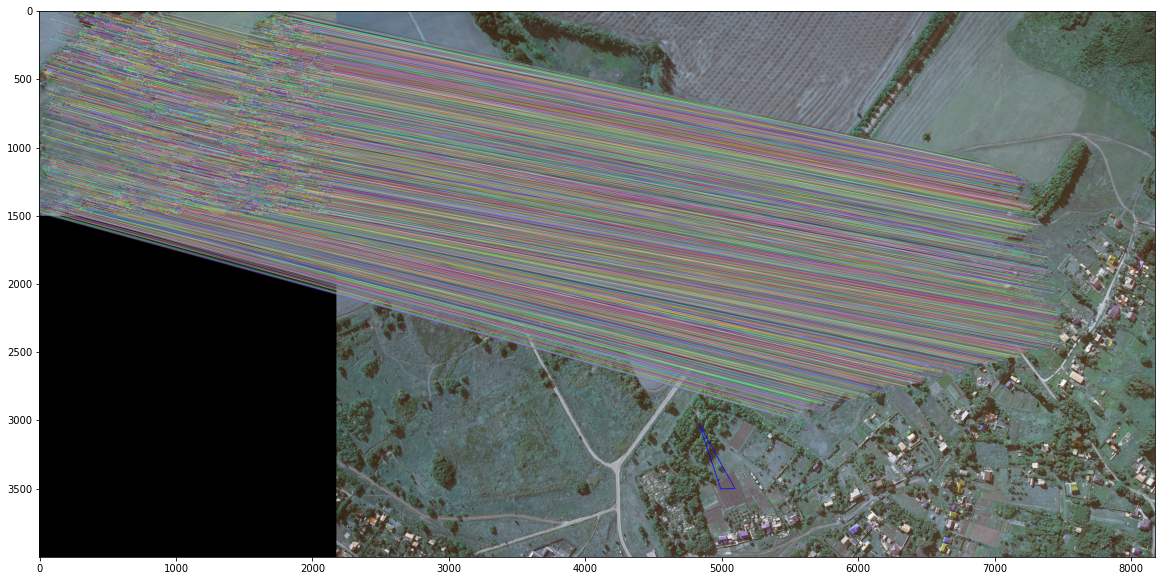

In [47]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches1, None, flags=2)
flann_matches = cv2.polylines(flann_matches, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(flann_matches)

## relationships between Flann matches to determine a sensible homography

In [ ]:
import cv2
import numpy as np
MIN_MATCH_COUNT = 4

img1 = cv2.imread("D:/images/small.jpg")
img2 = cv2.imread("D:/images/big.jpg")

#imgname1 = "box.png"
#imgname2 = "box_in_scene.png"

## (1) prepare data
#img1 = cv2.imread(imgname1)
#img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = img2.copy()

## (7) find homography matrix
## 当有足够的健壮匹配点对（至少4个）时
if len(good)>MIN_MATCH_COUNT:
    ## 从匹配中提取出对应点对
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    ## 掩模，用作绘制计算单应性矩阵时用到的点对
    #matchesMask2 = mask.ravel().tolist()
    ## 计算图1的畸变，也就是在图2中的对应的位置。
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    ## 绘制边框
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)

## (9) Crop the matched region from scene
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))

## (10) save and display
cv2.imwrite("matched.png", matched)
cv2.imwrite("found.png", found)
cv2.imshow("matched", matched)
cv2.imshow("found", found)
cv2.waitKey()
cv2.destroyAllWindows()

## All Data

In [1]:
import cv2
import numpy as np
MIN_MATCH_COUNT = 4

In [2]:
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

In [4]:
for i in range(1, 11):
    img1 = cv2.imread("D:/images/test/" + str(i) + ".jpg")
    img2 = cv2.imread("D:/images/test/target.jpg")
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    ## (2) Create SIFT object
    sift = cv2.xfeatures2d.SURF_create()
    
    ## (3) Create flann matcher
    matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})
    
    ## (4) Detect keypoints and compute keypointer descriptors
    kpts1, descs1 = sift.detectAndCompute(gray1,None)
    kpts2, descs2 = sift.detectAndCompute(gray2,None)
    
    ## (5) knnMatch to get Top2
    matches = matcher.knnMatch(descs1, descs2, 2)
    # Sort by their distance.
    matches = sorted(matches, key = lambda x:x[0].distance)
    
    ## (6) Ratio test, to get good matches.
    good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]
    canvas = img2.copy()
    
    ## (7) find homography matrix
    ## 当有足够的健壮匹配点对（至少4个）时
    if len(good)>MIN_MATCH_COUNT:
        ## 从匹配中提取出对应点对
        ## (queryIndex for the small object, trainIndex for the scene )
        src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        ## find homography matrix in cv2.RANSAC using good match points
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        ## 掩模，用作绘制计算单应性矩阵时用到的点对
        #matchesMask2 = mask.ravel().tolist()
        ## 计算图1的畸变，也就是在图2中的对应的位置。
        h,w = img1.shape[:2]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        ## 绘制边框
        cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))
        
    ## (8) drawMatches
    matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)
    cv2.imwrite("D:/images/test/SURF/" + str(i) + "_target.png", matched)
    t = np.int32(dst)
    np.savetxt("D:/images/test/SURF/" + str(i) + "_target.txt", t.flatten())
    
    ## (9) Crop the matched region from scene
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
    found = cv2.warpPerspective(img2,perspectiveM,(w,h))
    
    cv2.imwrite("D:/images/test/SURF/found_" + str(i) + "_target.png", found)

In [11]:
img1 = cv2.imread("D:/images/test/1.jpg")
img2 = cv2.imread("D:/images/test/target.jpg")

In [12]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [13]:
## (2) Create SIFT object
sift = cv2.xfeatures2d.SURF_create()

In [14]:
## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

In [15]:
## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

In [16]:
## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

In [17]:
## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = img2.copy()

In [18]:
## (7) find homography matrix
## 当有足够的健壮匹配点对（至少4个）时
if len(good)>MIN_MATCH_COUNT:
    ## 从匹配中提取出对应点对
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    ## 掩模，用作绘制计算单应性矩阵时用到的点对
    #matchesMask2 = mask.ravel().tolist()
    ## 计算图1的畸变，也就是在图2中的对应的位置。
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    ## 绘制边框
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


In [19]:
## (8) drawMatches
matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)

In [20]:
cv2.imwrite("1_target.png", matched)

True

In [21]:
[np.int32(dst)]

[array([[[11812,  5395]],
 
        [[ 9962,  6438]],
 
        [[10213,  5503]],
 
        [[13802,  8508]]])]

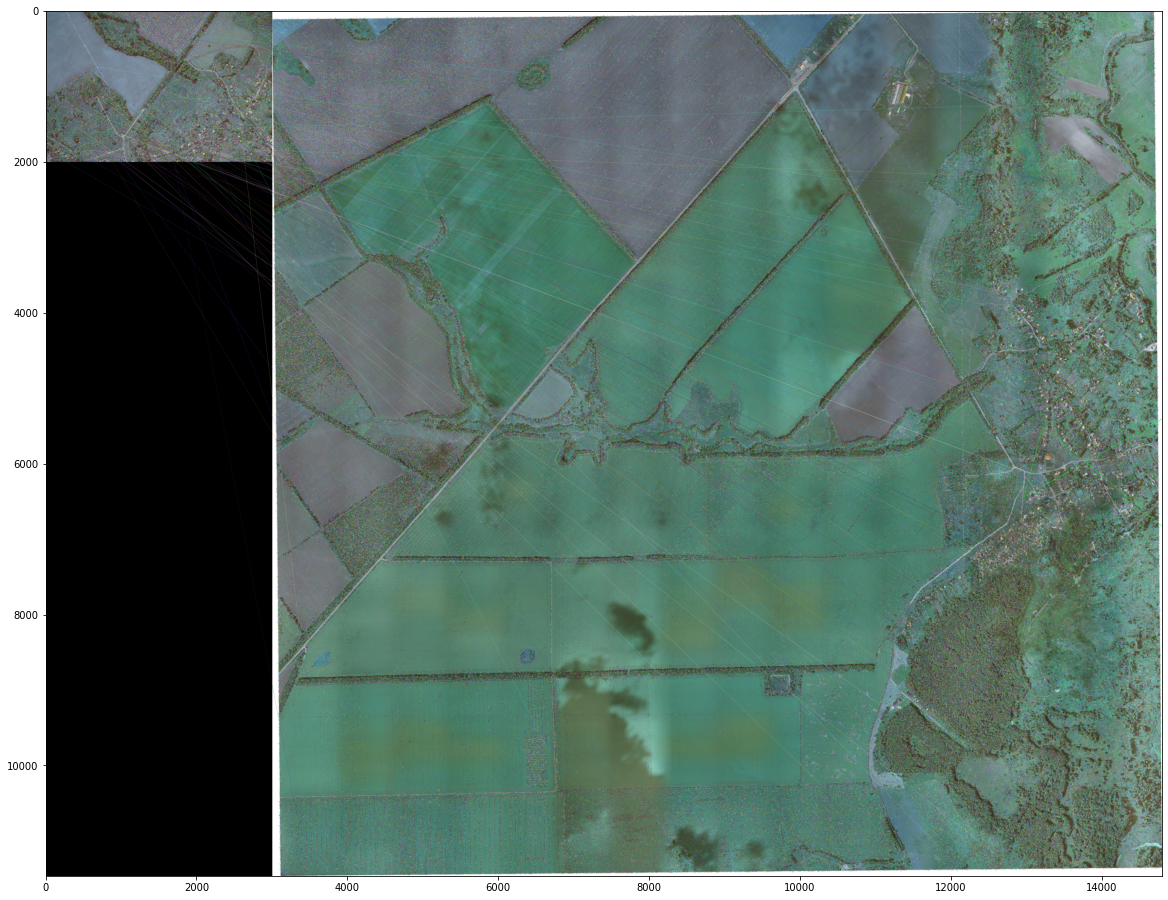

In [22]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(matched)

In [23]:
## (9) Crop the matched region from scene
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))

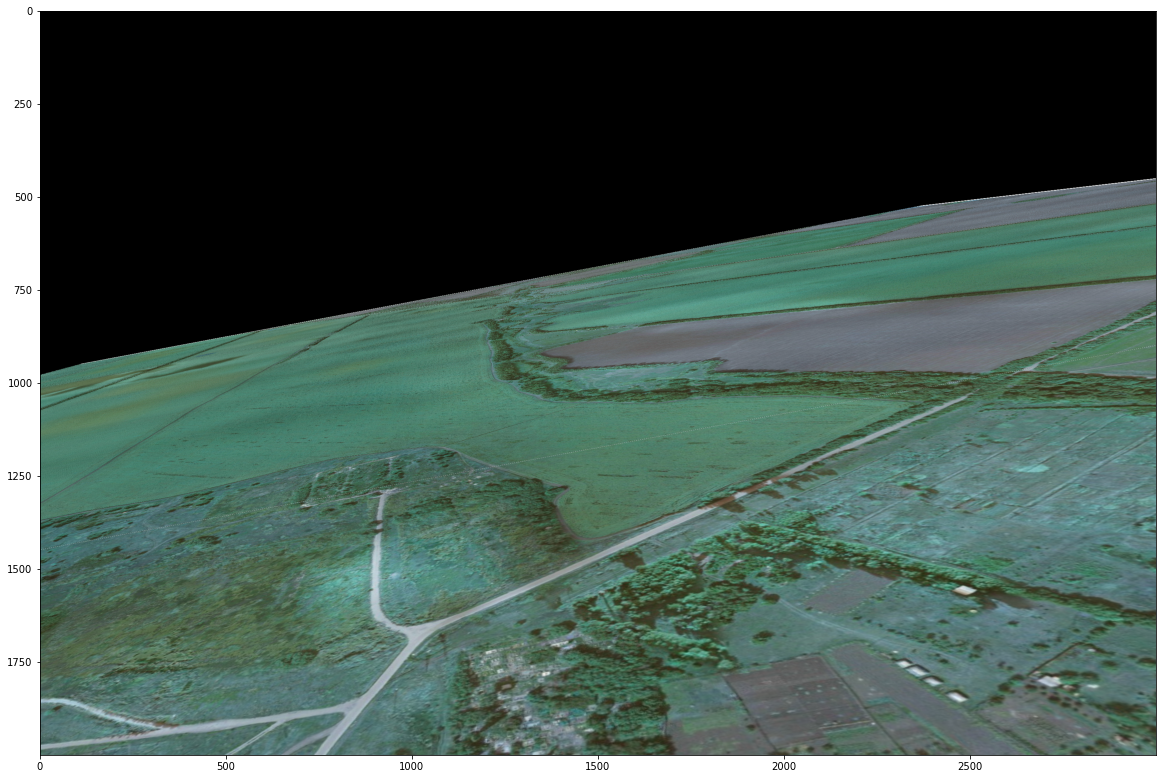

In [24]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(found)

In [25]:
cv2.imshow("found_1_target.png", found)